In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
# import tensorflow_datasets as tfds



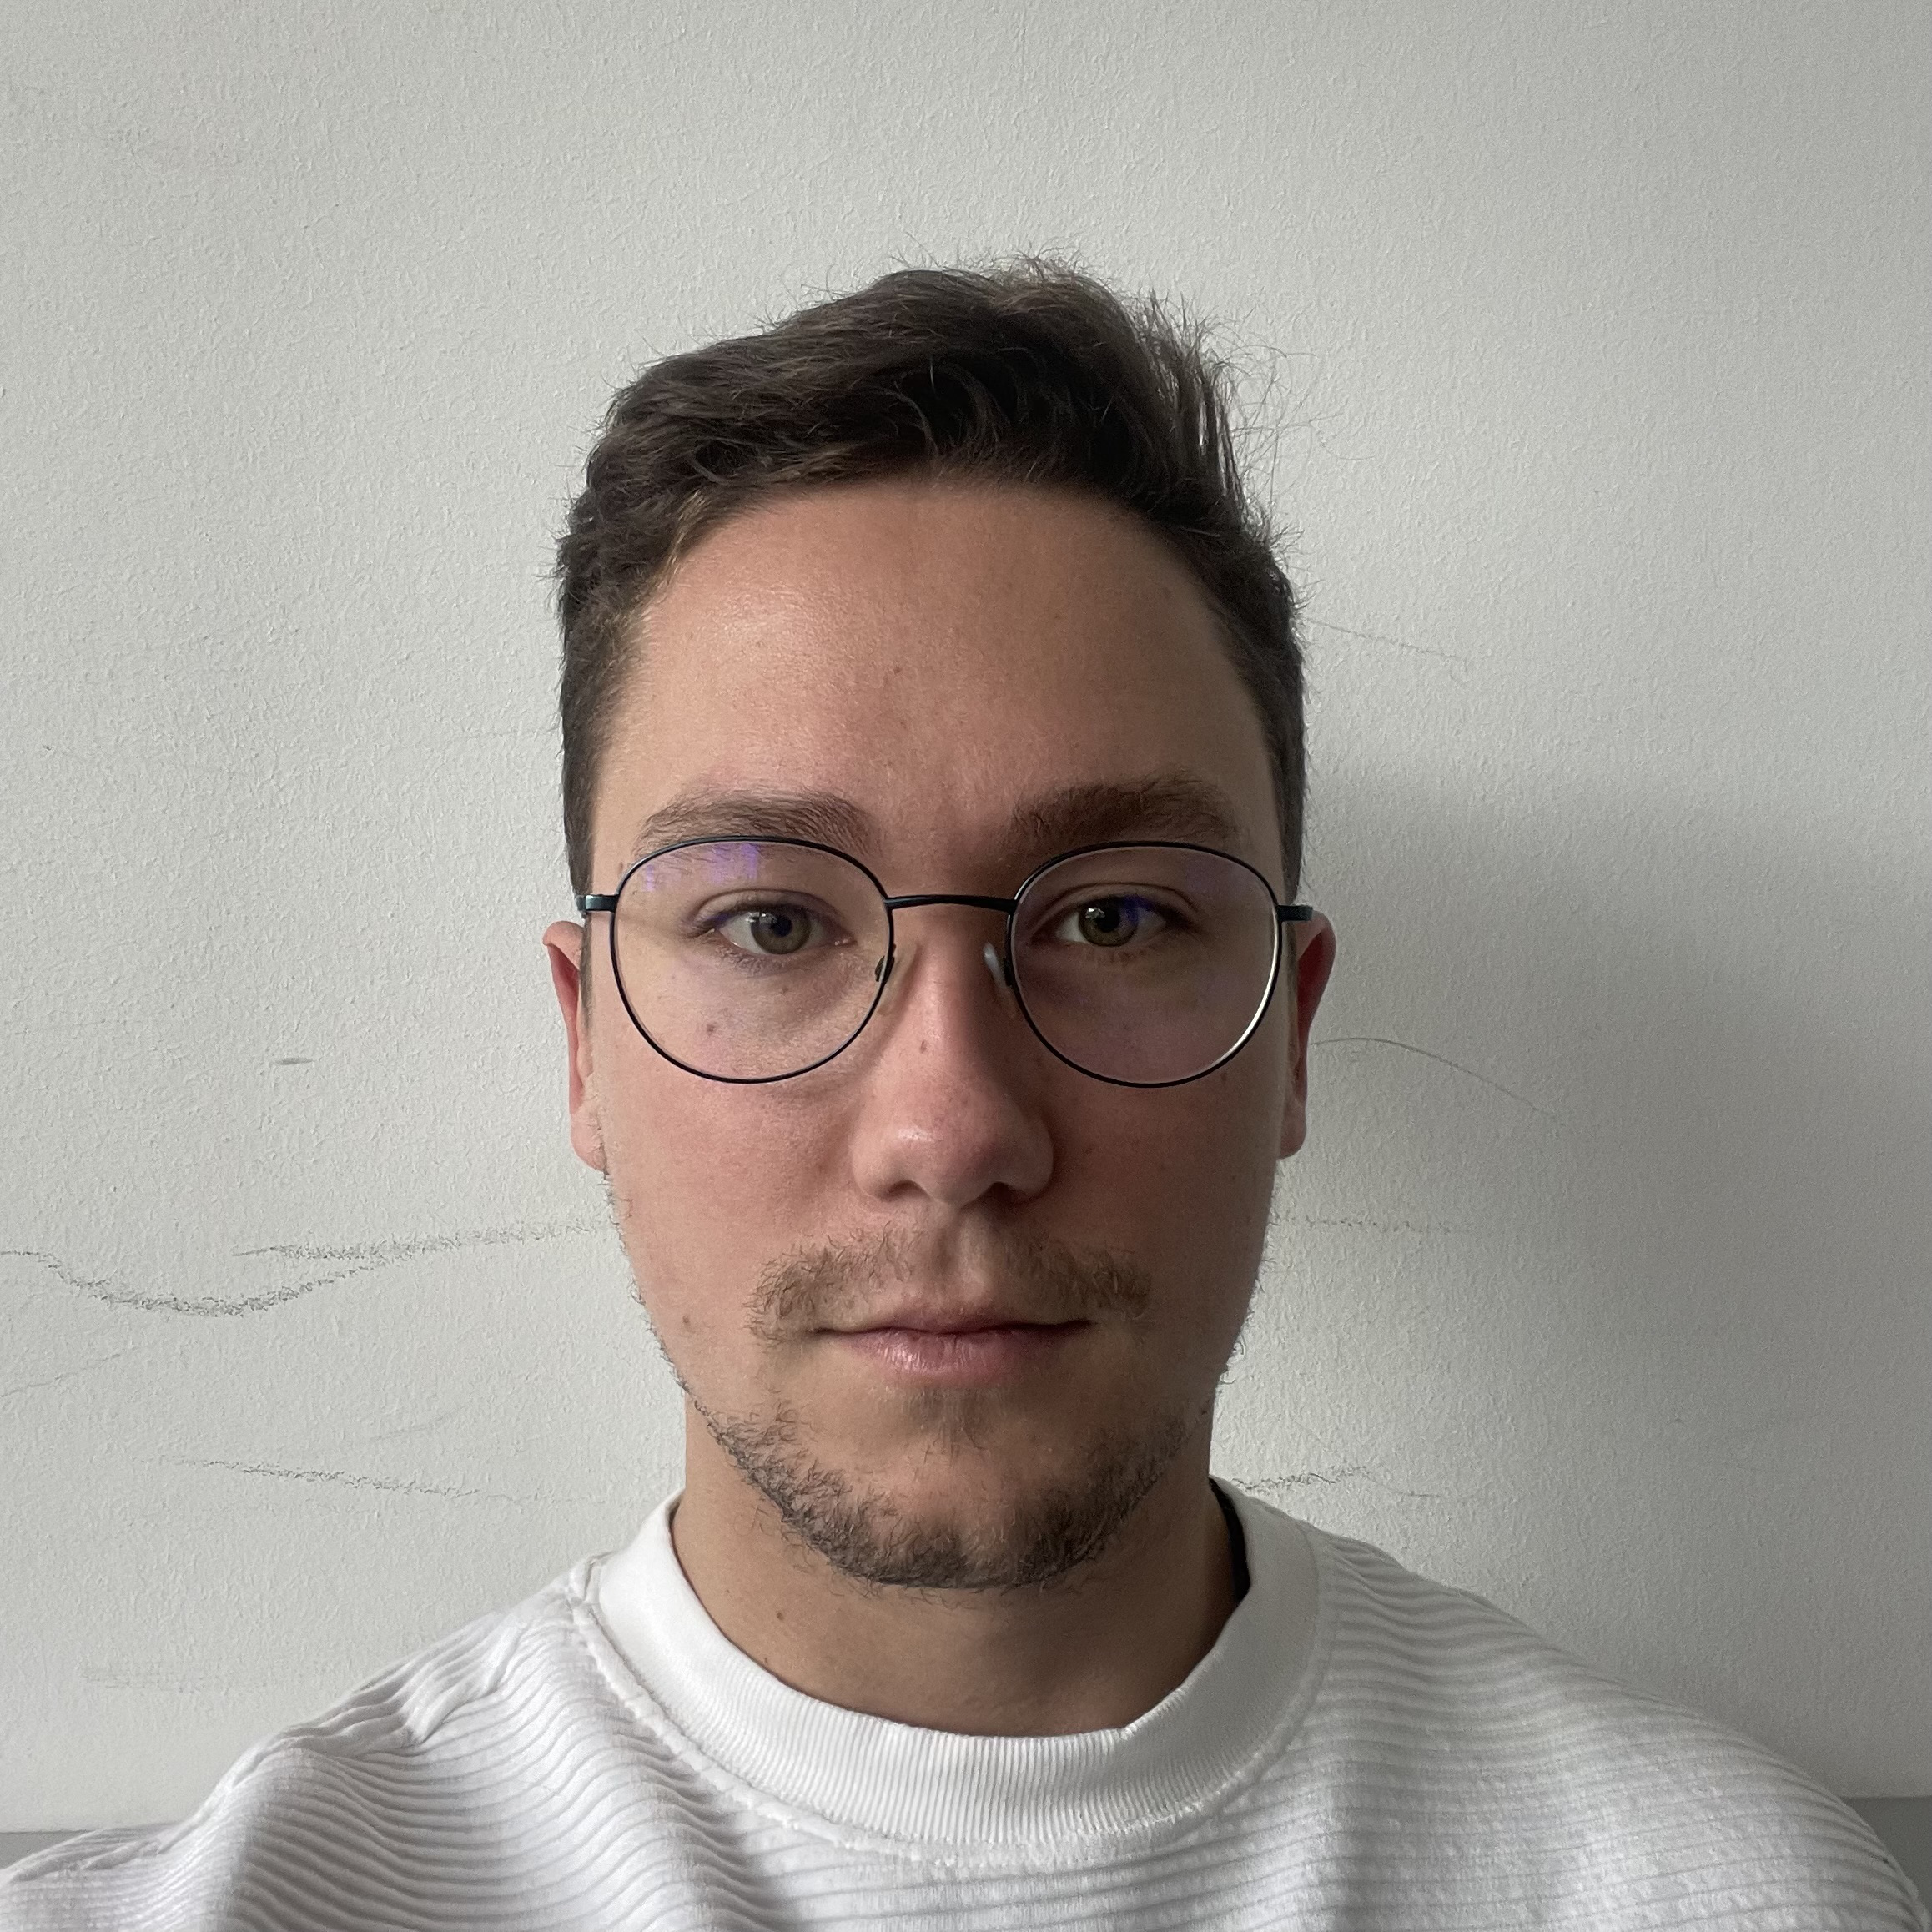

In [4]:

img = "data/IMG_3559.jpg"
PIL.Image.open(str(img))

In [6]:
import matplotlib.pyplot as plt

In [7]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)


In [9]:
# flipped = tf.image.flip_left_right(img)
# visualize(img, flipped)


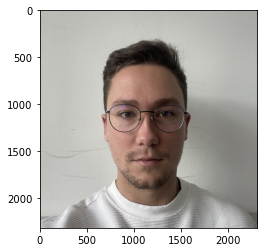

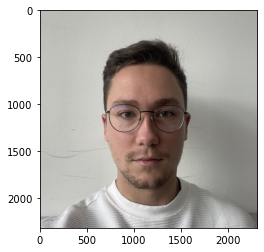

In [17]:
from PIL import Image

img = Image.open("data/IMG_3559.jpg")
img.save("data/IMG_3559_new.jpg", dpi=(600,600))
img = np.array(img)
plt.imshow(img)
plt.show()

img2 = Image.open("data/IMG_3559_new.jpg")
img2 = np.array(img2)
plt.imshow(img2)
plt.show()


In [1]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [2]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

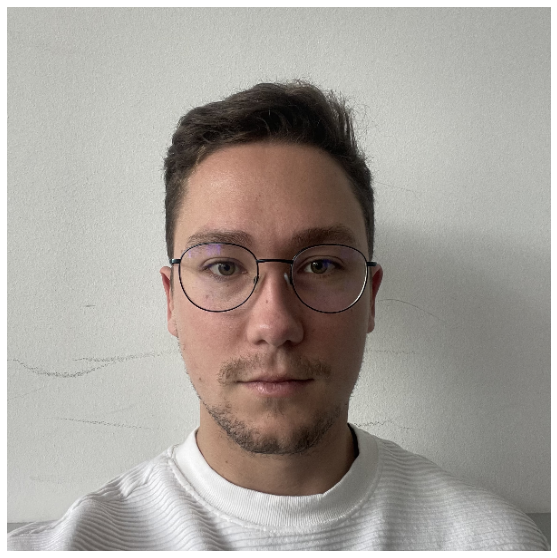

In [45]:
image = cv2.imread('data/IMG_3559.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = A.resize(image, height=600,width=600)
cv2.imwrite('data/augmented_image.jpg', image)
visualize(image)


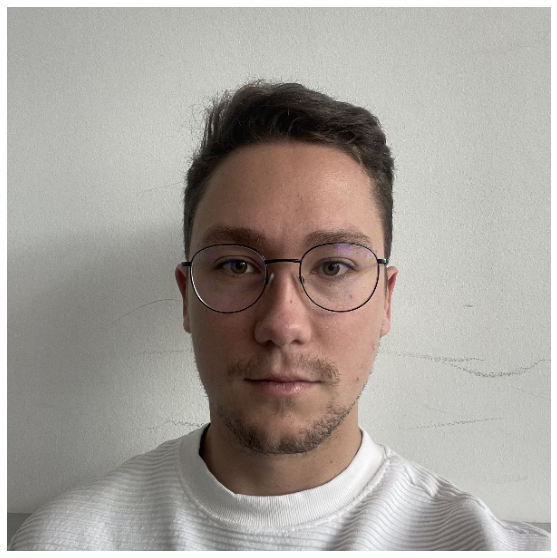

In [89]:
transform = A.HorizontalFlip(p=1)
random.seed(7)
augmented_image = transform(image=image)['image']
cv2.imwrite('data/augmented_image1.jpg', augmented_image)
visualize(augmented_image)

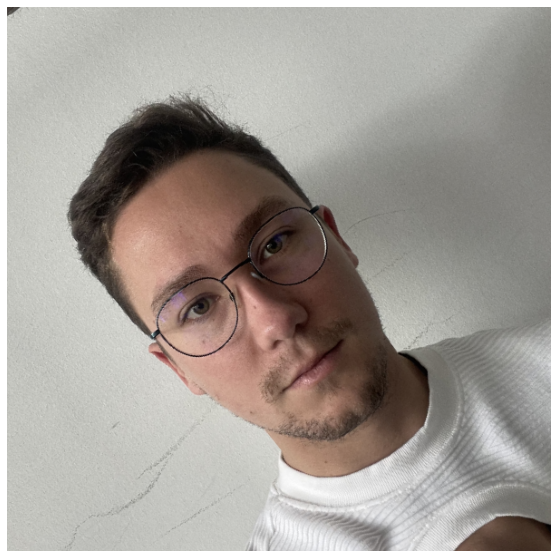

In [110]:
transform = A.ShiftScaleRotate(p=1, rotate_limit= 460)
random.seed(7) 
augmented_image = transform(image=image)['image']
cv2.imwrite('data/augmented_image2.jpg', augmented_image)
visualize(augmented_image)

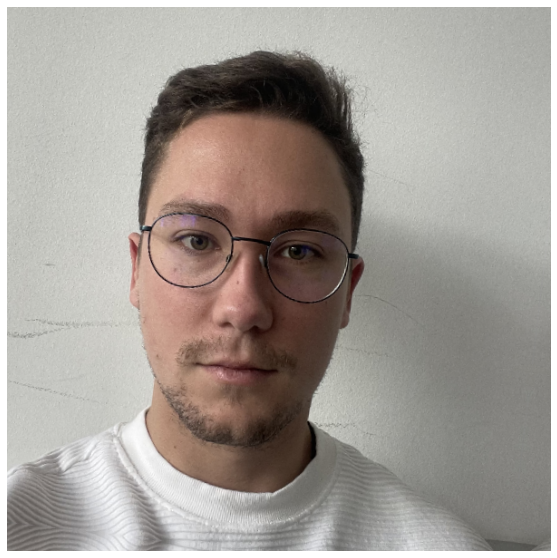

In [81]:
transform = A.ShiftScaleRotate(p=0.5)
#random.seed(7) 
augmented_image = transform(image=image)['image']
cv2.imwrite('data/augmented_image2.jpg', augmented_image)
visualize(augmented_image)

In [148]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import cv2
import random
class Data_augmentation:
    def __init__(self, path, image_name):
        '''
        Import image
        :param path: Path to the image
        :param image_name: image name
        '''
        self.path = path
        self.name = image_name
        print(path)
        self.image = cv2.imread(path)

    def rotate(self, image, angle=90, scale=1.0):
        '''
        Rotate the image
        :param image: image to be processed
        :param angle: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
        :param scale: Isotropic scale factor.
        '''
        w = image.shape[1]
        h = image.shape[0]
        #rotate matrix
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
        #rotate
        image = cv2.warpAffine(image,M,(w,h))
        return image

    def flip(self, image, vflip=False, hflip=False):
        '''
        Flip the image
        :param image: image to be processed
        :param vflip: whether to flip the image vertically
        :param hflip: whether to flip the image horizontally
        '''
        if hflip or vflip:
            if hflip and vflip:
                c = -1
            else:
                c = 0 if vflip else 1
            image = cv2.flip(image, flipCode=c)
        return image 
    
    
    def image_augment(self, save_path): 
        '''
        Create the new image with imge augmentation
        :param path: the path to store the new image
        ''' 
        img = self.image.copy()
        img_flip = self.flip(img, vflip=True, hflip=False)
        img_rot = self.rotate(img)
        # img_gaussian = self.add_GaussianNoise(img)
        
        name_int = self.name[:len(self.name)-4]
        cv2.imwrite(save_path+self.name+'_vflip.jpg', img_flip)
        cv2.imwrite(save_path+self.name+'_rot.jpg', img_rot)
        print("function")
        # cv2.imwrite(save_path+'%s' %str(name_int)+'_GaussianNoise.jpg', img_gaussian)
    
    
def main():
    # for root, _, files in os.walk(data/):
    #     print(root)
    # for file in files:
    print("start")
    image = cv2.imread('data/IMG_3559.jpg')
    raw_image = Data_augmentation('data/IMG_3559.jpg','IMG_3559')
    output_path1 = "/data/new/"
    raw_image.image_augment(output_path1)
    print("end")
    
if __name__ == "__main__":
    main()
    

start
data/IMG_3559.jpg
function
end


In [143]:
if __name__ == "__main__":
    main()

data/IMG_3559.jpg


In [15]:
import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# https://www.kaggle.com/code/hanzh0420/image-augmentation-with-opencv/script


import math
import os
import cv2
import random
from matplotlib import pyplot as plt


def rotate(image, angle=90, scale=1.0):
    '''
    Rotate the image
    :param image: image to be processed
    :param angle: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
    :param scale: Isotropic scale factor.
    '''
    w = image.shape[1]
    h = image.shape[0]
    #rotate matrix
    M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
    #rotate
    image = cv2.warpAffine(image,M,(w,h))
    dim = largest_rotated_rect(600,600,angle)
    
    resized = cv2.resize(image, dim)
    visualize(resized)
    return resized

def largest_rotated_rect(w, h, angle):
    """
    Given a rectangle of size wxh that has been rotated by 'angle' (in
    radians), computes the width and height of the largest possible
    axis-aligned rectangle within the rotated rectangle.

    Original JS code by 'Andri' and Magnus Hoff from Stack Overflow

    Converted to Python by Aaron Snoswell
    """

    quadrant = int(math.floor(angle / (math.pi / 2))) & 3
    sign_alpha = angle if ((quadrant & 1) == 0) else math.pi - angle
    alpha = (sign_alpha % math.pi + math.pi) % math.pi

    bb_w = w * math.cos(alpha) + h * math.sin(alpha)
    bb_h = w * math.sin(alpha) + h * math.cos(alpha)

    gamma = math.atan2(bb_w, bb_w) if (w < h) else math.atan2(bb_w, bb_w)

    delta = math.pi - alpha - gamma

    length = h if (w < h) else w

    d = length * math.cos(alpha)
    a = d * math.sin(alpha) / math.sin(delta)

    y = a * math.cos(gamma)
    x = y * math.tan(gamma)

    return (
        bb_w - 2 * x,
        bb_h - 2 * y
    )

def flip(image, vflip=False, hflip=False):
    '''
    Flip the image
    :param image: image to be processed
    :param vflip: whether to flip the image vertically
    :param hflip: whether to flip the image horizontally
    '''
    if hflip or vflip:
        if hflip and vflip:
            c = -1
        else:
            c = 0 if vflip else 1
        image = cv2.flip(image, flipCode=c)
    return image 


def image_augment(image, img_flip, img_rot, save_path, name): 
    '''
    Create the new image with imge augmentation
    :param path: the path to store the new image
    ''' 
    cv2.imwrite(save_path+name+'_vflip.jpg', img_flip)
    cv2.imwrite(save_path+name+'_rot.jpg', img_rot)
    visualize(image)
    visualize(img_flip)
    visualize(img_rot)
    print("function")
    # cv2.imwrite(save_path+'%s' %str(name_int)+'_GaussianNoise.jpg', img_gaussian)

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)




def main():
    # for root, _, files in os.walk(data/):
    #     print(root)
    # for file in files:
    print("start")
    image = cv2.imread('data/IMG_3559.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    dim = (600,600)
    image = cv2.resize(image, dim)
    img_rot = rotate(image, angle=45)
    img_flip = flip(image, hflip=True)
    image_augment(image, img_flip, img_rot, 'data/new/', 'augmented_img')

    print("end")
    
if __name__ == "__main__":
    main()
    

start


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
